In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
fifa = pd.read_csv("fifa_cleaned.csv")

In [3]:
fifa.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


In [4]:
fifa.shape

(17954, 92)

In [5]:
### Dropping irrelevant columns 

fifa.drop(["id","full_name","birth_date"],axis = 1, inplace= True)

In [6]:
fifa.shape

(17954, 89)

In [7]:
fifa.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,48.357302,58.680183,47.162861,47.733040,45.705915,16.784449,16.556199,16.388660,16.541049,16.874067
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,15.810844,11.625541,20.037346,21.674973,21.285812,17.893895,17.108234,16.701447,17.231495,18.182943
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,5.000000,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,38.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,49.000000,60.000000,52.500000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,92.000000,90.000000,94.000000


In [8]:
### Checcking for null values 

fifa.isnull().sum()

name             0
age              0
height_cm        0
weight_kgs       0
positions        0
              ... 
LB            2065
LCB           2065
CB            2065
RCB           2065
RB            2065
Length: 89, dtype: int64

In [9]:
### Running a for loop to check all the null values columns 

null_values_cols = [] 

for col in fifa.columns:
    if fifa[col].isnull().any():
        null_values_cols.append(col)
        
print(null_values_cols)

['value_euro', 'wage_euro', 'release_clause_euro', 'club_team', 'club_rating', 'club_position', 'club_jersey_number', 'club_join_date', 'contract_end_year', 'national_team', 'national_rating', 'national_team_position', 'national_jersey_number', 'tags', 'traits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']


In [10]:
null_values_cols = fifa[null_values_cols]

In [11]:
null_values_cols.shape

(17954, 41)

In [12]:
### Droping the subset dataset from the orginal one 

fifa = fifa.drop(null_values_cols.columns, axis=1)

In [13]:
fifa.shape

(17954, 48)

In [14]:
### Columns contains null values 

null_values_cols.head()

,value_euro,wage_euro,release_clause_euro,club_team,club_rating,club_position,club_jersey_number,club_join_date,contract_end_year,national_team,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,110500000.0,565000.0,226500000.0,FC Barcelona,86.0,RW,10.0,2004-07-01,2021,Argentina,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,69500000.0,205000.0,133800000.0,Tottenham Hotspur,83.0,LCM,23.0,2013-08-30,2020,Denmark,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,73000000.0,255000.0,144200000.0,Manchester United,82.0,LCM,6.0,2016-08-09,2021,France,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,62000000.0,165000.0,105400000.0,Napoli,82.0,LS,24.0,2010-07-01,2022,Italy,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,60000000.0,135000.0,106500000.0,Napoli,82.0,LCB,26.0,2014-07-01,2021,NaN,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


In [15]:
null_values_cols.isnull().mean().sort_values(ascending=False)

national_team_position    0.952267
national_team             0.952267
national_rating           0.952267
national_jersey_number    0.952267
tags                      0.921076
traits                    0.546786
LM                        0.115016
LCM                       0.115016
CM                        0.115016
RCM                       0.115016
RM                        0.115016
LWB                       0.115016
LDM                       0.115016
CF                        0.115016
CAM                       0.115016
CDM                       0.115016
RDM                       0.115016
RWB                       0.115016
LB                        0.115016
LCB                       0.115016
CB                        0.115016
RCB                       0.115016
RAM                       0.115016
RB                        0.115016
LAM                       0.115016
LW                        0.115016
RW                        0.115016
ST                        0.115016
RS                  

In [16]:
### Removing all the column where more than 50% of data is missing 

null_values_cols.drop(["national_team_position","national_team","national_rating","national_jersey_number","tags","traits"],axis =1, inplace = True)

In [17]:
null_values_cols.shape

(17954, 35)

In [18]:
### majority or more than 85% of the missing values columns are catagorical columns so filling the missing values with mode 

null_values_cols = null_values_cols.fillna(null_values_cols.mode().iloc[0])

In [19]:
null_values_cols.isnull().sum()

value_euro             0
wage_euro              0
release_clause_euro    0
club_team              0
club_rating            0
club_position          0
club_jersey_number     0
club_join_date         0
contract_end_year      0
LS                     0
ST                     0
RS                     0
LW                     0
LF                     0
CF                     0
RF                     0
RW                     0
LAM                    0
CAM                    0
RAM                    0
LM                     0
LCM                    0
CM                     0
RCM                    0
RM                     0
LWB                    0
LDM                    0
CDM                    0
RDM                    0
RWB                    0
LB                     0
LCB                    0
CB                     0
RCB                    0
RB                     0
dtype: int64

In [20]:
### Adding subset with orginal df after handling the null values

fifa = pd.concat([fifa ,null_values_cols], axis=1)

In [21]:
fifa.shape

(17954, 83)

# EDA ( Exploratory Data Analysis)

In [22]:
### Age Distribution

fifa["age"].unique()

array([31, 27, 25, 20, 30, 32, 26, 24, 33, 29, 23, 22, 21, 34, 37, 35, 28,
       39, 36, 18, 38, 41, 19, 40, 46, 17, 45, 44, 42], dtype=int64)

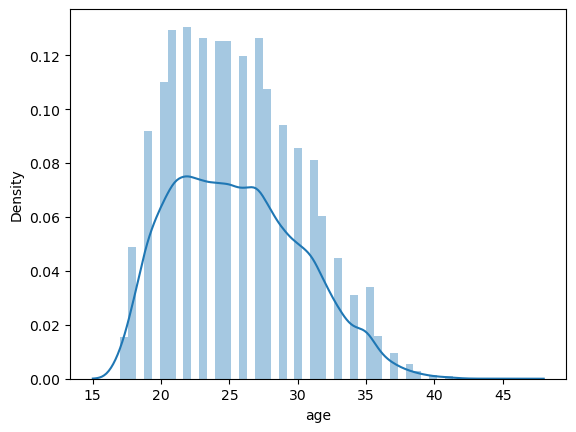

In [23]:
sns.distplot(fifa["age"], kde = True)
plt.show()

### Most of the players are between age 20 - 30 who played fifa

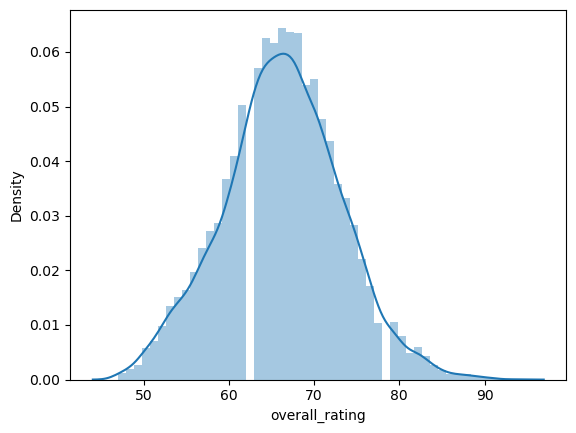

In [24]:
### Raatings of player 

sns.distplot(fifa["overall_rating"], kde = True)
plt.show()

### Average ration of player who played fifa is around 70

In [25]:
### Checking which player got the higest rating 

player_name = fifa.loc[fifa['overall_rating'].idxmax(), 'name']
player_name

'L. Messi'

## L.Messi got the Higest overall rating which is 94

In [26]:
fifa["club_position"].unique()

array(['RW', 'LCM', 'LS', 'LCB', 'ST', 'GK', 'RS', 'CDM', 'SUB', 'RCB',
       'LB', 'LDM', 'CAM', 'RAM', 'LW', 'LAM', 'CM', 'RM', 'LM', 'RES',
       'RB', 'RDM', 'RCM', 'LWB', 'LF', 'CB', 'RWB', 'RF', 'CF'],
      dtype=object)

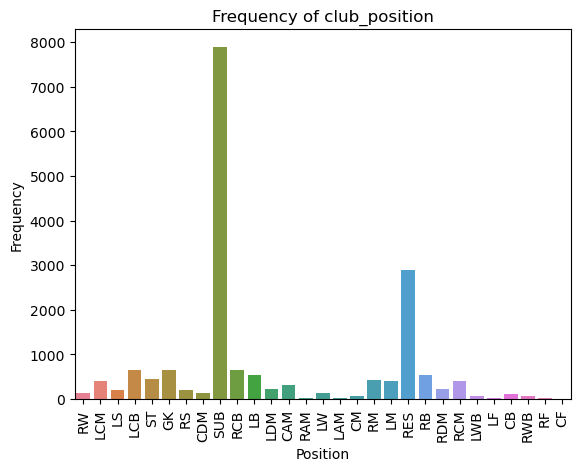

In [27]:
### Checking position of plyers in the clubs 

sns.countplot(x='club_position', data=fifa, palette='husl')
plt.title('Frequency of club_position')
plt.xlabel('Position')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.show()

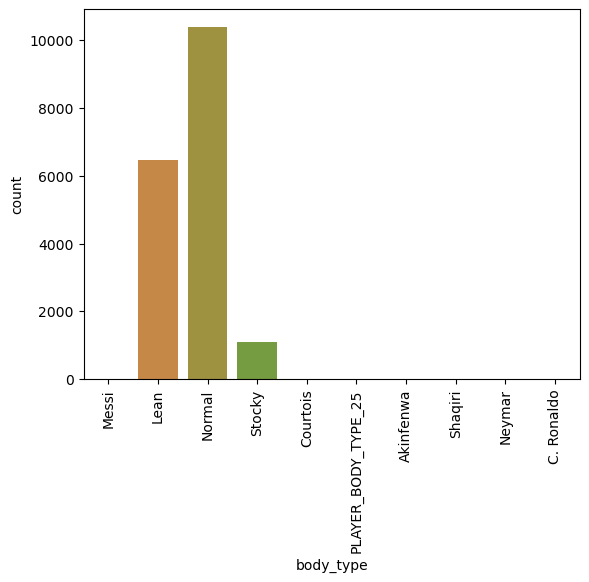

In [28]:
### players bodytypes 

sns.countplot(x="body_type" , data=fifa, palette='husl')
plt.xticks(rotation=90)
plt.show()

### Majority of the player have a Normal Body Type 

In [29]:
fifa.loc[fifa['value_euro'].idxmax(), 'name']

'L. Messi'

## Players wages increasing as per their value ---->> L.Messi got the higest value and higest wages

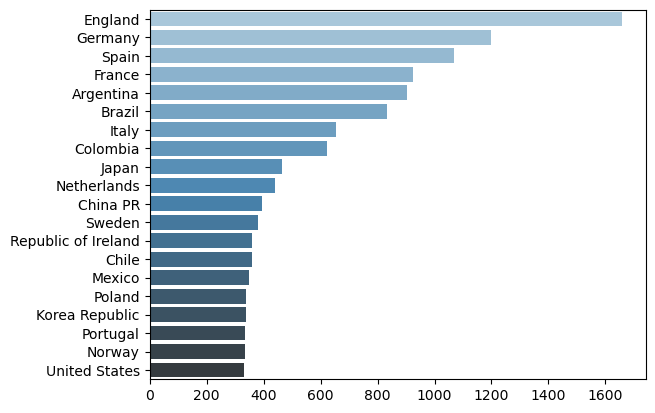

In [30]:
### Checking which country have the higest number of player participation 

top_categories = fifa['nationality'].value_counts().nlargest(20)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='Blues_d')
plt.show()

## Above graphical representation shows that the England have the higest number of player 

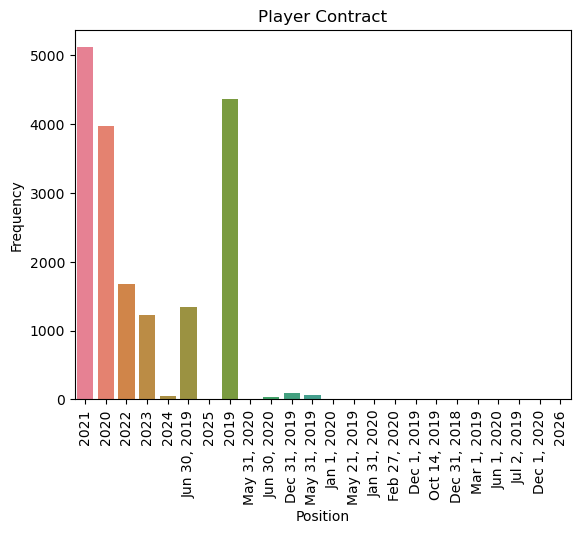

In [31]:
### Checking Player Contract information

sns.countplot(x='contract_end_year', data=fifa, palette='husl')
plt.title('Player Contract')
plt.xlabel('Position')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.show()

## From the above graphical representation it shows that most of the contract eneded in between 2019 -2023

### EDA Conclusion --> From the above short EDA found that most of the player age are arround 25 years with average ration from 65-70. Where L.Messi got the higest ranting and higehst wages as well.
### Most of the players belongs from England 
### Majority of the players have a normal body types and if their heights increases their weight simultaneously increase

In [32]:
### Creating 2 subset of my dataset to handle values seprately 

# Subset containing float and int columns
subset1 = fifa.select_dtypes(include=['float64', 'int64'])

# Subset containing object and category columns
subset2 = fifa.select_dtypes(include=['object', 'category'])

In [33]:
print(f"Numerical data shape-{subset1.shape}")
print(f"Catagorical data shape-{subset2.shape}")

Numerical data shape-(17954, 47)
Catagorical data shape-(17954, 36)


In [34]:
### Handling numerical data 1st 
### Using a for loop and storing all the columns which is correlated with each other more than 0.7 

correlation = subset1.corr().abs()

numerical_correlated_col= [] 

cols_to_remove = []

for col in correlation:
    if col not in cols_to_remove:
        highly_correlated_cols = correlation[col][correlation[col] > 0.7].index.tolist()
        if highly_correlated_cols:
            cols_to_remove.extend(highly_correlated_cols[1:])
            numerical_correlated_col.append(highly_correlated_cols[0])
        else:
            numerical_correlated_col.append(col)
            
print(numerical_correlated_col)

['age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential', 'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)', 'heading_accuracy', 'crossing', 'dribbling', 'jumping', 'short_passing', 'strength', 'aggression', 'finishing', 'value_euro', 'club_rating', 'club_jersey_number']


In [35]:
numerical_correlated_col = fifa[numerical_correlated_col]

In [36]:
numerical_correlated_col.shape

(17954, 19)

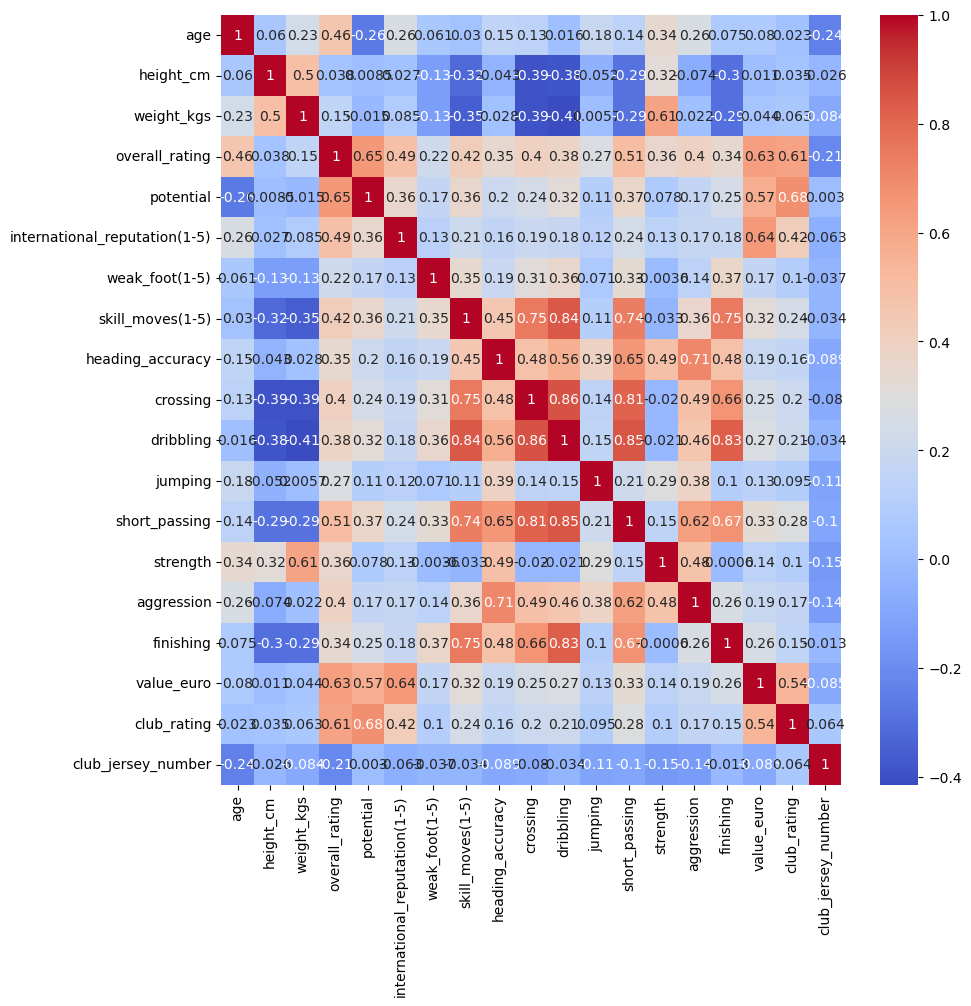

In [37]:
### Checking the correlated columns in heatmap  

plt.figure(figsize =(10,10))
sns.heatmap(numerical_correlated_col.corr(), annot = True, cmap="coolwarm")
plt.show()

In [38]:
### Columns still contains some highly correlated columns so removing it 

numerical_correlated_col.drop(["dribbling","jumping","short_passing","finishing","aggression","skill_moves(1-5)"],axis=1,inplace = True)

In [39]:
numerical_correlated_col.shape

(17954, 13)

In [40]:
### Applying variance to the dataset  

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.5)
selector

VarianceThreshold(threshold=0.5)

In [41]:
selector.fit_transform(numerical_correlated_col)

array([[3.1000e+01, 1.7018e+02, 7.2100e+01, ..., 1.1050e+08, 8.6000e+01,
        1.0000e+01],
       [2.7000e+01, 1.5494e+02, 7.6200e+01, ..., 6.9500e+07, 8.3000e+01,
        2.3000e+01],
       [2.5000e+01, 1.9050e+02, 8.3900e+01, ..., 7.3000e+07, 8.2000e+01,
        6.0000e+00],
       ...,
       [2.2000e+01, 1.8542e+02, 8.9800e+01, ..., 1.7000e+05, 6.9000e+01,
        3.1000e+01],
       [2.1000e+01, 1.7526e+02, 6.4900e+01, ..., 2.8000e+05, 7.4000e+01,
        8.7000e+01],
       [1.9000e+01, 1.9050e+02, 7.9800e+01, ..., 3.2500e+05, 7.1000e+01,
        7.4000e+01]])

In [42]:
### Checking all the columns which met the threshold of 0.5 oe 50%

selector.get_support()

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True])

In [43]:
### assigning all the selected column in columns 

columns = selector.get_support(indices = True)

In [44]:
### Storing selected columns in a new df --> Which contains all the rows and all selected columns after applying variance 

num_selected = numerical_correlated_col.iloc[:, columns]

In [45]:
num_selected.shape

(17954, 11)

In [46]:
num_selected.head()

,age,height_cm,weight_kgs,overall_rating,potential,heading_accuracy,crossing,strength,value_euro,club_rating,club_jersey_number
0,31,170.18,72.1,94,94,70,86,66,110500000.0,86.0,10.0
1,27,154.94,76.2,88,89,52,88,58,69500000.0,83.0,23.0
2,25,190.50,83.9,88,91,75,80,87,73000000.0,82.0,6.0
3,27,162.56,59.0,88,88,56,86,44,62000000.0,82.0,24.0
4,27,187.96,88.9,88,91,83,30,94,60000000.0,82.0,26.0


In [47]:
### Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [48]:
scaled_data = scaler.fit_transform(numerical_correlated_col)

In [49]:
scaled_data

array([[ 1.15491792, -0.33978909, -0.45190277, ..., 19.12664078,
         3.26874415, -0.62495985],
       [ 0.30486273, -1.42610574,  0.12690825, ..., 11.86831031,
         2.67931768,  0.16476479],
       [-0.12016487,  1.10863311,  1.21394359, ..., 12.48792388,
         2.48284219, -0.86795204],
       ...,
       [-0.75770627,  0.74652756,  2.04686677, ..., -0.40534949,
        -0.07133918,  0.65074918],
       [-0.97022006,  0.02231646, -1.4683514 , ..., -0.38587592,
         0.91103827,  4.05263992],
       [-1.39524766,  1.10863311,  0.63513257, ..., -0.37790946,
         0.3216118 ,  3.26291528]])

In [50]:
### Using PCA for dimensionality reduction 

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca

PCA(n_components=3)

In [51]:
compressed_data = pca.fit_transform(scaled_data)
compressed_data

array([[16.71521682, -2.71788023,  4.95445504],
       [10.81630032, -3.28531825,  2.98959512],
       [12.60177836, -0.05493751,  3.57408627],
       ...,
       [-2.64238249,  2.43921066,  2.86911506],
       [-1.13067496, -2.40253663,  1.66733363],
       [-0.72692815,  0.04198854,  1.99225004]])

In [52]:
### Now handling the catagorical data 

subset2.head()

,name,positions,nationality,preferred_foot,work_rate,body_type,club_team,club_position,club_join_date,contract_end_year,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,L. Messi,"CF,RW,ST",Argentina,Left,Medium/ Low,Messi,FC Barcelona,RW,2004-07-01,2021,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,C. Eriksen,"CAM,RM,CM",Denmark,Right,High/ Medium,Lean,Tottenham Hotspur,LCM,2013-08-30,2020,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,P. Pogba,"CM,CAM",France,Right,High/ Medium,Normal,Manchester United,LCM,2016-08-09,2021,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,L. Insigne,"LW,ST",Italy,Right,High/ Medium,Normal,Napoli,LS,2010-07-01,2022,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,K. Koulibaly,CB,Senegal,Right,High/ High,Normal,Napoli,LCB,2014-07-01,2021,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


In [53]:
### As per the above EDA got that the few columns are not useful for machine learning prespective so dropping the useless column from dataset
### Already have a subset of position value in my data set so removing position & club position from my dataset as well 
subset2.drop(["name","nationality","preferred_foot","contract_end_year","club_join_date","club_team","positions","club_position"],axis=1,inplace = True)

In [54]:
subset2.head()

,work_rate,body_type,LS,ST,RS,LW,LF,CF,RF,RW,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,Medium/ Low,Messi,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,High/ Medium,Lean,79+3,79+3,79+3,85+3,84+3,84+3,84+3,85+3,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,High/ Medium,Normal,81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,High/ Medium,Normal,78+3,78+3,78+3,86+3,85+3,85+3,85+3,86+3,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,High/ High,Normal,53+3,53+3,53+3,53+3,54+3,54+3,54+3,53+3,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


In [55]:
### Using label encoder to for club position subset columns dataset

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [56]:
le = LabelEncoder()
print(le)
scaler = MinMaxScaler()
print(scaler)

LabelEncoder()
MinMaxScaler()


In [57]:
### Taking all the club position subset column 

other_subset = subset2[["work_rate","body_type"]]
subset2.drop(["work_rate","body_type"],axis=1,inplace= True)

In [58]:
### Applying label encoder on subset2 dataset

for col in subset2:
    le = LabelEncoder()
    subset2[col] = le.fit_transform(subset2[col])

subset2.head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,93,93,93,104,102,102,102,104,101,101,...,53,48,48,48,53,45,30,30,30,45
1,79,79,79,98,94,94,94,98,97,97,...,69,70,70,70,69,60,50,50,50,60
2,83,83,83,93,92,92,92,93,94,94,...,79,82,82,82,79,77,81,81,81,77
3,77,77,77,100,95,95,95,100,97,97,...,52,43,43,43,52,44,23,23,23,44
4,28,28,28,34,33,33,33,34,35,35,...,73,82,82,82,73,81,106,106,106,81


In [59]:
### Applying One Hot Encoding (OHE) on the other subset catagorical dataset 

from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
print(OHE)

OneHotEncoder()


In [60]:
encoded_data = OHE.fit_transform(other_subset).toarray()

In [61]:
OHE.categories_

[array(['High/ High', 'High/ Low', 'High/ Medium', 'Low/ High', 'Low/ Low',
        'Low/ Medium', 'Medium/ High', 'Medium/ Low', 'Medium/ Medium'],
       dtype=object),
 array(['Akinfenwa', 'C. Ronaldo', 'Courtois', 'Lean', 'Messi', 'Neymar',
        'Normal', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Stocky'], dtype=object)]

In [62]:
categories = OHE.categories_
concatenated_array = np.concatenate(categories)

In [63]:
features = pd.DataFrame(encoded_data, columns=concatenated_array)

In [64]:
features.head()

,High/ High,High/ Low,High/ Medium,Low/ High,Low/ Low,Low/ Medium,Medium/ High,Medium/ Low,Medium/ Medium,Akinfenwa,C. Ronaldo,Courtois,Lean,Messi,Neymar,Normal,PLAYER_BODY_TYPE_25,Shaqiri,Stocky
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [65]:
### Adding both the catagorical subset data 

catagorical_data = pd.concat([features.reset_index(drop=True), subset2], axis=1)

In [66]:
catagorical_data.shape

(17954, 45)

In [67]:
### Applying variance to the dataset  

from sklearn.feature_selection import VarianceThreshold
selector1 = VarianceThreshold(threshold=0.5)
selector1

VarianceThreshold(threshold=0.5)

In [68]:
selector.fit_transform(catagorical_data)

array([[93., 93., 93., ..., 30., 30., 45.],
       [79., 79., 79., ..., 50., 50., 60.],
       [83., 83., 83., ..., 81., 81., 77.],
       ...,
       [42., 42., 42., ..., 61., 61., 55.],
       [36., 36., 36., ...,  6.,  6.,  9.],
       [34., 34., 34., ..., 14., 14., 10.]])

In [69]:
### Checking all the columns which met the threshold of 0.5 oe 50%

selector.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [70]:
### assigning all the selected column in columns 

columns1 = selector.get_support(indices = True)

In [71]:
### Storing selected columns in a new df --> Which contains all the rows and all selected columns after applying variance 

cat_selected = catagorical_data.iloc[:, columns]

In [72]:
cat_selected.shape

(17954, 11)

In [73]:
### Scaling the data 

from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1

StandardScaler()

In [74]:
scaled_data1 = scaler1.fit_transform(cat_selected)
scaled_data1

array([[-0.23425758, -0.19734362, -0.4562112 , ..., -0.00746331,
        -0.00746331, -0.75041343],
       [-0.23425758, -0.19734362,  2.19196723, ..., -0.00746331,
        -0.00746331,  1.33259875],
       [-0.23425758, -0.19734362,  2.19196723, ..., -0.00746331,
        -0.00746331, -0.75041343],
       ...,
       [-0.23425758, -0.19734362, -0.4562112 , ..., -0.00746331,
        -0.00746331, -0.75041343],
       [-0.23425758, -0.19734362, -0.4562112 , ..., -0.00746331,
        -0.00746331,  1.33259875],
       [-0.23425758, -0.19734362, -0.4562112 , ..., -0.00746331,
        -0.00746331, -0.75041343]])

In [75]:
### Using PCA for Dimensionality Reduction 

from sklearn.decomposition import PCA
pca1 = PCA(n_components=3)
pca1

PCA(n_components=3)

In [76]:
compressed_data1 = pca1.fit_transform(scaled_data1)

In [77]:
compressed_data1

array([[ 1.2594536 ,  0.22888645,  2.06253378],
       [ 1.97564132, -0.47711437, -1.70812999],
       [ 1.83668896, -0.20635383, -1.38321339],
       ...,
       [-1.14334158,  0.06804622, -0.02715043],
       [ 1.39840597, -0.04187409,  1.73761718],
       [-1.14334158,  0.06804622, -0.02715043]])

In [78]:
### Now adding Numerical Compressed data and catagorical compressed data together 

fifa_df = np.concatenate((compressed_data1, compressed_data), axis=1)

In [79]:
fifa_df

array([[ 1.2594536 ,  0.22888645,  2.06253378, 16.71521682, -2.71788023,
         4.95445504],
       [ 1.97564132, -0.47711437, -1.70812999, 10.81630032, -3.28531825,
         2.98959512],
       [ 1.83668896, -0.20635383, -1.38321339, 12.60177836, -0.05493751,
         3.57408627],
       ...,
       [-1.14334158,  0.06804622, -0.02715043, -2.64238249,  2.43921066,
         2.86911506],
       [ 1.39840597, -0.04187409,  1.73761718, -1.13067496, -2.40253663,
         1.66733363],
       [-1.14334158,  0.06804622, -0.02715043, -0.72692815,  0.04198854,
         1.99225004]])

# Now Data is ready for further Machine Learning (ML) Process ...........